In [36]:
# Import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import mutual_info_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Data Loading

In [2]:
# Load the data from a CSV file
try:
    df = pd.read_csv('data/USDA_Branded_Normalized_5_Manual.csv', sep=';')  # Replace '****.csv' with the actual file name
except FileNotFoundError:
    print("Error: File not found. Please check the file name and path.")
    exit()
except Exception as e:
    print(f"An error occurred while loading the data: {e}")
    exit()

# Data Processing

In [3]:
df_clean = df.dropna()

In [4]:
df = df_clean.head(20000).copy()

In [5]:
df

,Food_ID,Food_Name,Protein_g,Total_Fat_g,Carbs_g,Energy_kcal,Fiber_g,Sat_Fat_g,Sugars_g,Weight_g,Nutri_Score
0,1105904,WESSON Vegetable Oil 1 GAL,0.00,93.33,0.00,867,0.0,13.33,0.00,100,0.0000
1,1105905,SWANSON BROTH BEEF,0.83,0.00,0.42,4,0.0,0.00,0.42,100,5.0605
2,1105906,CAMPBELL'S SLOW KETTLE SOUP CLAM CHOWDER,2.45,5.31,6.12,82,0.4,1.02,0.41,100,4.5795
3,1105907,CAMPBELL'S SLOW KETTLE SOUP CHEESE BROCCOLI,1.22,6.12,5.31,82,0.4,2.45,0.82,100,3.8950
4,1105908,SWANSON BROTH CHICKEN,0.83,0.00,0.42,4,0.0,0.00,0.42,100,5.0605
...,...,...,...,...,...,...,...,...,...,...,...
20388,1132631,"CHICKEN & SHRIMP VIETNAMESE SPRING ROLL, CHICK...",10.58,3.53,27.63,200,1.2,0.29,7.64,100,5.2055
20389,1132632,"GUMMY CAR KITS, LEMON, BLUEBERRY, STRAWBERRY, ...",7.14,0.00,75.00,321,0.0,0.00,53.57,100,0.0000
20390,1132633,PACIFIC OYSTERS,9.73,2.21,5.31,80,0.0,0.44,0.00,100,6.1085
20391,1132634,"SWEET POTATO CHEESECAKE, SWEET POTATO",4.42,21.24,33.63,363,1.8,10.62,18.58,100,0.0000


In [6]:
df.describe()

,Food_ID,Protein_g,Total_Fat_g,Carbs_g,Energy_kcal,Fiber_g,Sat_Fat_g,Sugars_g,Weight_g,Nutri_Score
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.0,20000.000000
mean,1.119460e+06,8.058575,13.828846,30.932624,276.17220,2.512985,4.913691,12.323729,100.0,3.113072
std,9.378478e+03,8.036180,15.504888,25.298818,178.70165,3.404391,6.998601,15.437020,0.0,2.514849
min,1.105904e+06,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,100.0,0.000000
25%,1.112595e+06,2.470000,1.430000,7.200000,107.00000,0.000000,0.000000,1.430000,100.0,0.052625
50%,1.119576e+06,5.750000,9.170000,23.330000,270.00000,1.300000,2.220000,4.920000,100.0,3.387750
75%,1.126280e+06,11.270000,21.430000,53.570000,407.00000,3.600000,7.140000,20.000000,100.0,5.048000
max,1.847363e+06,60.000000,100.000000,80.000000,900.00000,20.000000,90.480000,80.000000,100.0,10.000000


In [7]:
print(f"Shape: {df.shape}")

Shape: (20000, 11)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 20392
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Food_ID      20000 non-null  int64  
 1   Food_Name    20000 non-null  object 
 2   Protein_g    20000 non-null  float64
 3   Total_Fat_g  20000 non-null  float64
 4   Carbs_g      20000 non-null  float64
 5   Energy_kcal  20000 non-null  int64  
 6   Fiber_g      20000 non-null  float64
 7   Sat_Fat_g    20000 non-null  float64
 8   Sugars_g     20000 non-null  float64
 9   Weight_g     20000 non-null  int64  
 10  Nutri_Score  20000 non-null  float64
dtypes: float64(7), int64(3), object(1)
memory usage: 1.8+ MB


# Data Statistics

In [9]:
# Get descriptive statistics
df.describe()

,Food_ID,Protein_g,Total_Fat_g,Carbs_g,Energy_kcal,Fiber_g,Sat_Fat_g,Sugars_g,Weight_g,Nutri_Score
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.0,20000.000000
mean,1.119460e+06,8.058575,13.828846,30.932624,276.17220,2.512985,4.913691,12.323729,100.0,3.113072
std,9.378478e+03,8.036180,15.504888,25.298818,178.70165,3.404391,6.998601,15.437020,0.0,2.514849
min,1.105904e+06,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,100.0,0.000000
25%,1.112595e+06,2.470000,1.430000,7.200000,107.00000,0.000000,0.000000,1.430000,100.0,0.052625
50%,1.119576e+06,5.750000,9.170000,23.330000,270.00000,1.300000,2.220000,4.920000,100.0,3.387750
75%,1.126280e+06,11.270000,21.430000,53.570000,407.00000,3.600000,7.140000,20.000000,100.0,5.048000
max,1.847363e+06,60.000000,100.000000,80.000000,900.00000,20.000000,90.480000,80.000000,100.0,10.000000


In [10]:
# Compute additional statistics
# Use numeric columns only to avoid errors from text fields like Food_Name
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Exlude identifier or constant-like columns
exclude=['Food_ID', 'Weight_g']
relevant_cols = [c for c in numeric_cols if c not in exclude]

print(f'Numeric columns used: {relevant_cols}')

# Describe statistics for the numeric and relevant columns
dfr = df[relevant_cols]
stats_summary = dfr.describe()
print(stats_summary)

# Skewness: measures asymmetry of the distribution (positive = right-skewed)
skew = dfr.skew()
print('\nSkewness(how lopsided the data is):')
print(skew)
# Kurtosis: measures tail weight (higher = heavier tails / more outliers)
kurt = dfr.kurtosis()
print('\nKurtosis(how heavy the tails are):')
print(kurt)

Numeric columns used: ['Protein_g', 'Total_Fat_g', 'Carbs_g', 'Energy_kcal', 'Fiber_g', 'Sat_Fat_g', 'Sugars_g', 'Nutri_Score']
          Protein_g   Total_Fat_g       Carbs_g  Energy_kcal       Fiber_g  \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       8.058575     13.828846     30.932624    276.17220      2.512985   
std        8.036180     15.504888     25.298818    178.70165      3.404391   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        2.470000      1.430000      7.200000    107.00000      0.000000   
50%        5.750000      9.170000     23.330000    270.00000      1.300000   
75%       11.270000     21.430000     53.570000    407.00000      3.600000   
max       60.000000    100.000000     80.000000    900.00000     20.000000   

          Sat_Fat_g      Sugars_g   Nutri_Score  
count  20000.000000  20000.000000  20000.000000  
mean       4.913691     12.323729      3.113072  
std        6.998601

In [42]:
dfr.describe()

,Protein_g,Total_Fat_g,Carbs_g,Energy_kcal,Fiber_g,Sat_Fat_g,Sugars_g,Nutri_Score
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000
mean,8.058575,13.828846,30.932624,276.17220,2.512985,4.913691,12.323729,3.113072
std,8.036180,15.504888,25.298818,178.70165,3.404391,6.998601,15.437020,2.514849
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2.470000,1.430000,7.200000,107.00000,0.000000,0.000000,1.430000,0.052625
50%,5.750000,9.170000,23.330000,270.00000,1.300000,2.220000,4.920000,3.387750
75%,11.270000,21.430000,53.570000,407.00000,3.600000,7.140000,20.000000,5.048000
max,60.000000,100.000000,80.000000,900.00000,20.000000,90.480000,80.000000,10.000000


# Data distribution

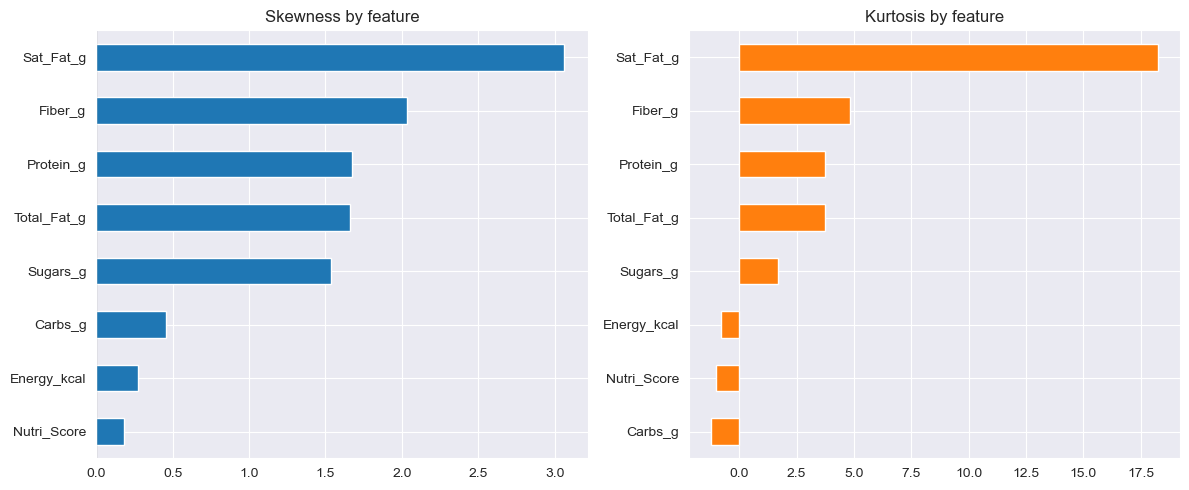

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
skew.sort_values().plot.barh(ax=axes[0], color='C0', title='Skewness by feature')
axes[0].axvline(0, color='k', linewidth=0.8)
kurt.sort_values().plot.barh(ax=axes[1], color='C1', title='Kurtosis by feature')

plt.tight_layout()
plt.savefig('skew_kurt_overview.png')
plt.show()

### Skewness & Kurtosis Overview
(`skew_kurt_overview.png`)

This image contains two summary charts:

* **Left Plot (Skewness by feature):** This is a horizontal bar chart that **ranks** your features by their **skewness** (asymmetry or lopsidedness). It confirms that `Sat_Fat_g` is the most skewed feature.
* **Right Plot (Kurtosis by feature):** This chart **ranks** your features by their **kurtosis** (a measure of how "heavy" the tails are, which indicates the presence of extreme outliers). It shows that `Sat_Fat_g` has by far the highest kurtosis, meaning it has the most extreme outliers.

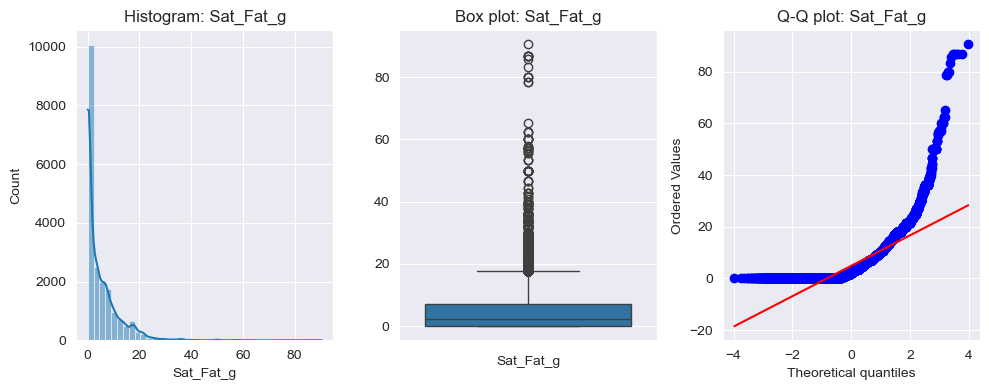

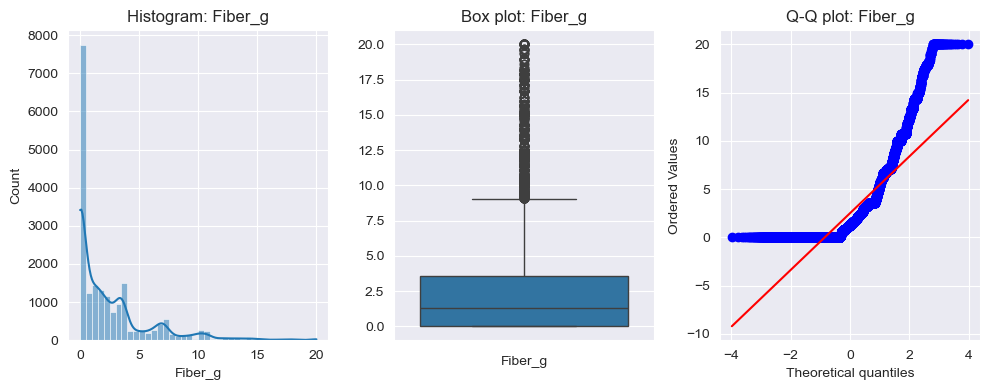

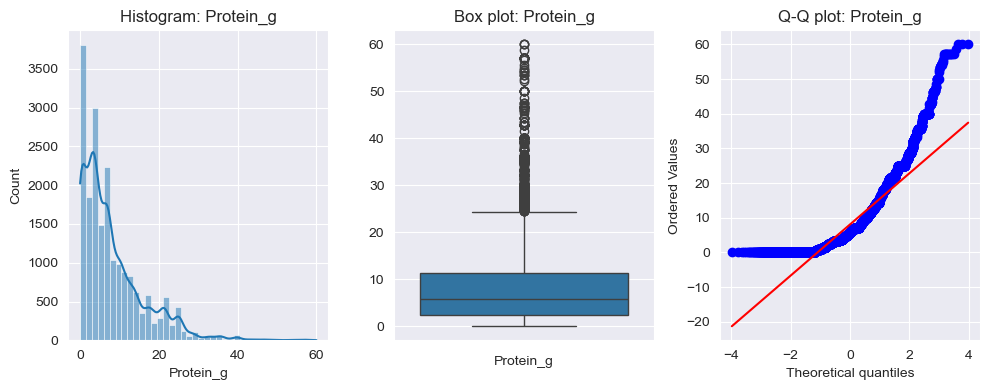

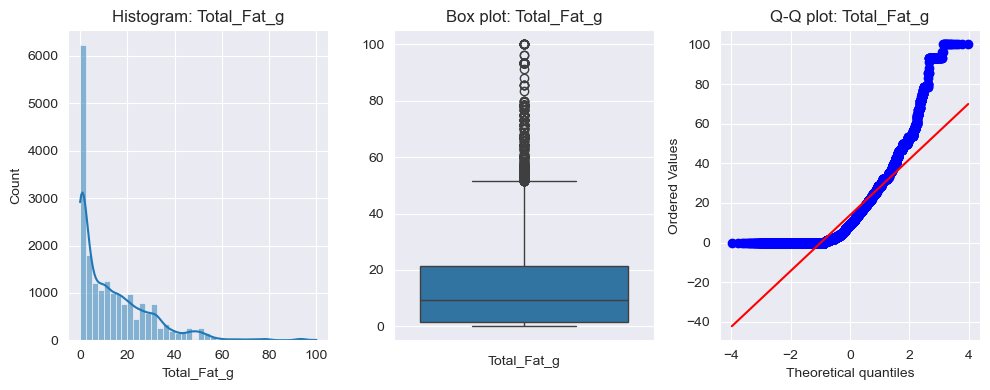

In [41]:
topN = 4
most_skewed = skew.abs().sort_values(ascending=False).head(topN).index
for feat in most_skewed:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4))
    sns.histplot(dfr[feat].dropna(), bins=40, kde=True, ax=ax1)
    ax1.set_title(f'Histogram: {feat}')
    sns.boxplot(y=dfr[feat].dropna(), ax=ax2)
    ax2.set_title(f'Box plot: {feat}')
    ax2.set_xlabel(feat)
    ax2.set_ylabel('')
    stats.probplot(dfr[feat].dropna(), dist="norm", plot=ax3)
    ax3.set_title(f'Q-Q plot: {feat}')
    plt.tight_layout()
    plt.savefig(f'{feat}_dist_qq.png')
    plt.show()

### Feature Distribution, Box Plot, & Q-Q Plots
(e.g., `Sat_Fat_g_dist_qq.png`, `Protein_g_dist_qq.png`, `Fiber_g_dist_qq.png`, `Total_Fat_g_dist_qq.png`)

These images each contain three plots for a single feature (like 'Sat_Fat_g'):

* **Left Plot (Histogram):** This shows the **distribution** of the data. The x-axis represents the value (e.g., grams of fat), and the y-axis shows the **count**, or how many data points fall into that range. These plots show the data is heavily **right-skewed** (bunched up at zero with a long tail of high values).

* **Middle Plot (Box Plot):** This provides a summary of the data's spread and explicitly identifies outliers.
    * The **box** itself shows the middle 50% of your data.
    * The **line inside the box** is the median (the middle value).
    * The **circles (`°`)** to the right are individual data points considered **outliers**.
    * In your plots, the box is very short and bunched to the left, while there's a long stream of outliers. This is another strong visual confirmation of both the **positive skew** and the **heavy presence of outliers**.

* **Right Plot (Q-Q Plot):** This plot compares the data's distribution to a perfect **normal distribution** (a bell curve).
    * The **red line** is what the data *would* look like if it were normally distributed.
    * The **blue dots** represent the *actual* data.
    * Since the blue dots curve far away from the red line, it visually confirms the data is **not normally distributed** and has many **outliers** (the dots far to the right).

# Correlation analysis

In [13]:
# Calculate Pearson correlation
corr_matrix=dfr.corr()

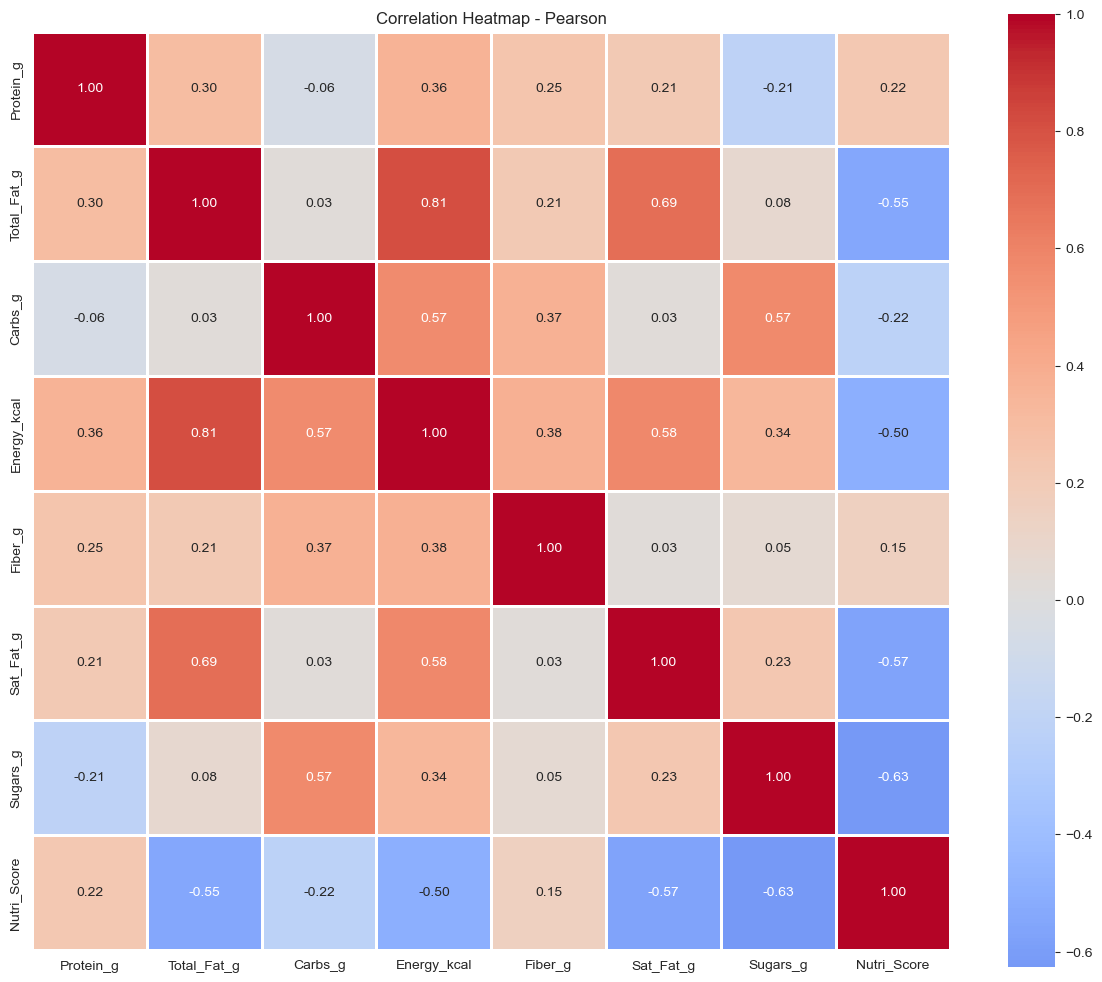

In [14]:
# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=1)
plt.title('Correlation Heatmap - Pearson')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

This plot gives a full picture, including how the features relate *to each other*.

* **What it is:** A grid where each cell shows the correlation between two features.
* **How to Read It:**
    * **Color:** Red means a positive correlation, blue means a negative correlation. The darker the color, the stronger the relationship (as shown on the color bar).
    * **Numbers:** These are the same correlation values from your text, but for every possible pair.
* **Your Key Findings:**
    1.  **Feature-Target (Bottom Row):** The bottom row, "Nutri_Score," visually confirms your text output. You can see the dark blue cells for `Sugars_g`, `Sat_Fat_g`, and `Total_Fat_g`, and the light red for `Protein_g`.
    2.  **Feature-Feature (Multicollinearity):** This is the *new* information. Look for strong correlations *between* your features.
        * **Example:** `Energy_kcal` and `Total_Fat_g` have a very strong positive correlation (0.81).
        * **Example:** `Sat_Fat_g` and `Total_Fat_g` are also highly correlated (0.69).
* **Project Use:** This is critical for **Component (3): Used ML technique(s)**. If you use a model like Linear Regression, high multicollinearity (like `Energy_kcal` and `Total_Fat_g`) can make the model unstable. Your analysis shows you might need to remove one of these redundant features or use a model that isn't affected by it (like a Random Forest).

In [15]:
# Correlation with Nutri_Score
nutri_corr=corr_matrix['Nutri_Score'].sort_values(ascending=False)
print('\nCorrelation with Nutri_Score:')
print(nutri_corr)


Correlation with Nutri_Score:
Nutri_Score    1.000000
Protein_g      0.221429
Fiber_g        0.153203
Carbs_g       -0.222541
Energy_kcal   -0.504597
Total_Fat_g   -0.550752
Sat_Fat_g     -0.570842
Sugars_g      -0.627126
Name: Nutri_Score, dtype: float64


* **What it is:** A ranked list showing the linear relationship between each feature and the target variable, `Nutri_Score`.
* **How to Read It:**
    * **Value:** 1.0 is a perfect positive correlation (as one goes up, the other goes up). -1.0 is a perfect negative correlation (as one goes up, the other goes down). 0 means no *linear* relationship.
    * **Your Key Findings:**
        * **Strongest Predictors:** `Sugars_g` (-0.63), `Sat_Fat_g` (-0.57), and `Total_Fat_g` (-0.55) are the most important features for predicting the `Nutri_Score`.
        * **Direction:** The negative sign means that as sugar, saturated fat, or total fat **increase**, the `Nutri_Score` **decreases**.
        * **Weak Predictors:** `Protein_g` (0.22) and `Fiber_g` (0.15) have a weak positive relationship.
* *Project Use:** This list *directly* informs your **feature importance** analysis. You can state that `Sugars_g` and fat content are the most dominant factors.

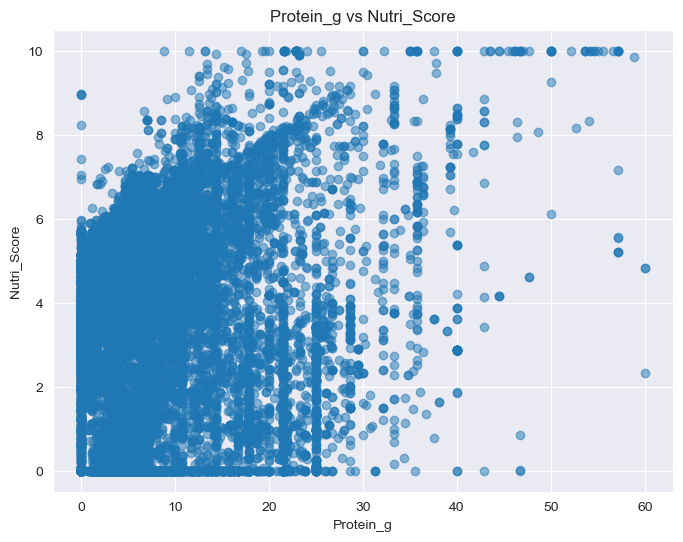

In [16]:
# Scatter plot for top correlated feature
top_feature=nutri_corr.index[1]
plt.figure(figsize=(8, 6))
plt.scatter(df[top_feature], df['Nutri_Score'], alpha=0.5)
plt.xlabel(top_feature)
plt.ylabel('Nutri_Score')
plt.title(f'{top_feature} vs Nutri_Score')
plt.savefig('top_correlation_scatter.png')
plt.show()


This plot gives you the "raw story" behind a single correlation number.

* **What it is:** A graph of every data point, showing its `Protein_g` value (x-axis) and its `Nutri_Score` (y-axis).
* **How to Read It:** You are looking for a pattern. The text/heatmap told you the correlation is a weak 0.22. This plot shows you *why*.
* **Your Key Findings:**
    * The points form a wide, messy cloud, not a clean line. This is why the correlation is weak.
    * There is a *slight* upward trend (as protein goes up, the score tends to go up), but it's not a strong rule.
    * You can see the data is "clamped" between `Nutri_Score` 0 and 10.
    * At low protein levels (0-10g), the `Nutri_Score` can be *anything* from 0 to 10.
* **Project Use:** This is a perfect example for your **Data Visualization and Interpretation**. It demonstrates that a simple correlation number doesn't tell the whole story and that the relationship between protein and Nutri-Score is "noisy" and complex.

# Independence testing

In [17]:
# Mutual Information
X = dfr.drop('Nutri_Score', axis=1)
y = df['Nutri_Score']
mi_scores = mutual_info_regression(X, y, random_state=42)
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Information': mi_scores}).sort_values('Mutual_Information', ascending=False)
print("Mutual Information Scores:")
print(mi_df)

Mutual Information Scores:
       Feature  Mutual_Information
3  Energy_kcal            1.272030
6     Sugars_g            1.202825
2      Carbs_g            1.037572
0    Protein_g            1.031604
1  Total_Fat_g            0.985800
5    Sat_Fat_g            0.825577
4      Fiber_g            0.653604


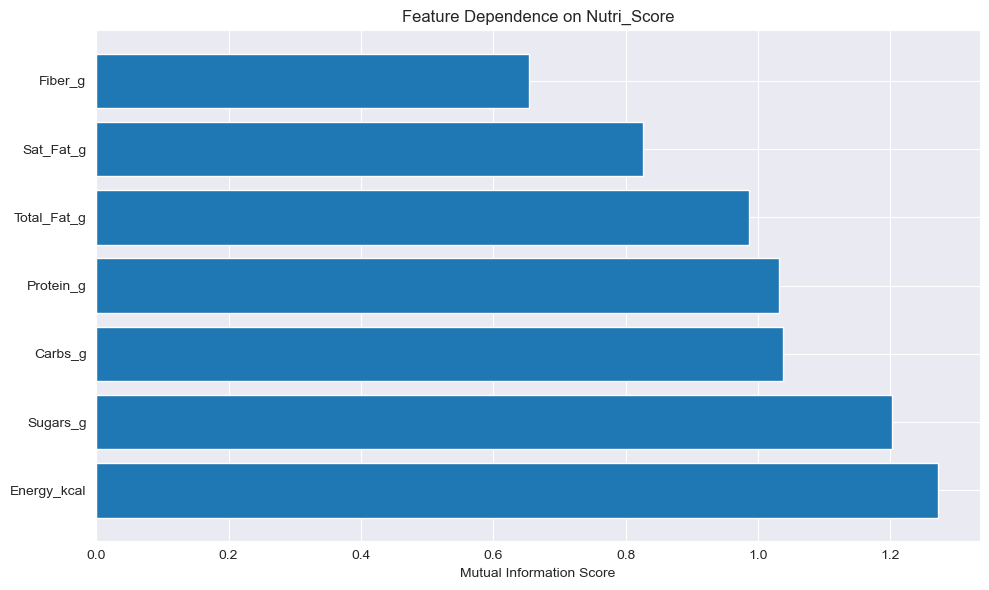

In [18]:
# Plot mutual information
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'], mi_df['Mutual_Information'])
plt.xlabel('Mutual Information Score')
plt.title('Feature Dependence on Nutri_Score')
plt.tight_layout()
plt.savefig('mutual_information.png')
plt.show()

### Mutual Information (Plot & Code)

This analysis is for **Feature Importance** (feature-to-target dependence).

* **What it does:** Mutual Information (MI) measures how much information a feature (e.g., `Sugars_g`) shares with your target variable (`Nutri_Score`). It's a powerful tool because, unlike Pearson correlation, it can capture **any kind of relationship**, not just linear ones.
* **How to read it:** A score of 0 means the variables are completely independent. A higher score means a stronger relationship.
* **Information Extracted:** The bar chart ranks the features by their predictive power. We see that `Energy_kcal` and `Sugars_g` have the strongest non-linear relationship with `Nutri_Score`. This is a more robust way to rank your features than just the linear correlation.


In [19]:
# Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor:")
print(vif_data.sort_values('VIF', ascending=False))


Variance Inflation Factor:
       Feature         VIF
3  Energy_kcal  178.499388
1  Total_Fat_g   55.979468
2      Carbs_g   48.359971
0    Protein_g    5.429327
5    Sat_Fat_g    3.242244
6     Sugars_g    2.866889
4      Fiber_g    2.184897


### Variance Inflation Factor (VIF)

This analysis is for **Independence** (feature-to-feature dependence), also known as **multicollinearity**.

* **What it does:** VIF checks if one of your features (like `Total_Fat_g`) can be predicted by *other features* (like `Sat_Fat_g` or `Energy_kcal`). It's looking for redundant information.
* **How to read it:**
    * **VIF = 1:** The feature is not correlated with others (this is perfect).
    * **VIF between 1-5:** The feature is moderately correlated.
    * **VIF > 5 (or 10):** The feature is highly correlated with other features.

**Information Extracted:** The VIF scores give you a clear list of redundant features. The scores for `Energy_kcal` (178.5), `Total_Fat_g` (56.0), and `Carbs_g` (48.4) are **exceptionally high** (a common threshold is 5 or 10), indicating severe multicollinearity. `Protein_g` (5.4) is also high. This means these features are strongly predictable by other features (e.g., `Total_Fat_g` is strongly related to `Energy_kcal`). In contrast, `Sat_Fat_g` (3.2), `Sugars_g` (2.9), and `Fiber_g` (2.2) have low VIF scores, suggesting they are relatively independent.
  

# Feature importance

In [20]:
# Prepare data
X = dfr.drop('Nutri_Score', axis=1)
y = df['Nutri_Score']

In [21]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [23]:
# Get feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_}).sort_values('Importance', ascending=False)
print("Feature Importance Ranking:")
print(feature_importance)

Feature Importance Ranking:
       Feature  Importance
5    Sat_Fat_g    0.458794
6     Sugars_g    0.293051
0    Protein_g    0.131553
1  Total_Fat_g    0.076108
4      Fiber_g    0.034505
3  Energy_kcal    0.003706
2      Carbs_g    0.002283


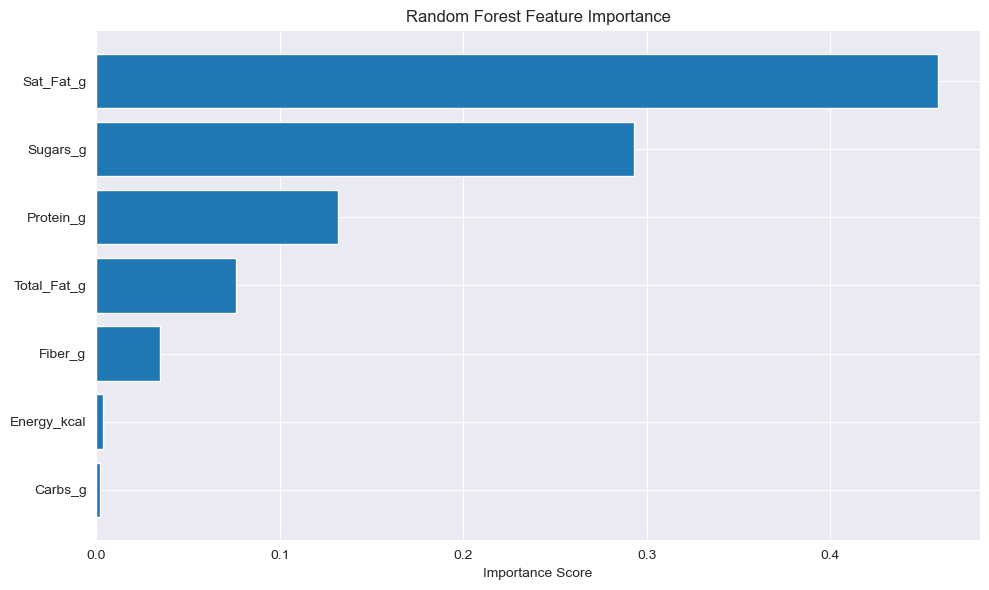

In [24]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance Score')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

In [25]:
# Check model performance
score = rf_model.score(X_test, y_test)
print(f"\nModel R² Score: {score:.3f}")


Model R² Score: 0.988


1.  **Result Validity:** The R² score of **0.988 (or 98.8%)** means your Random Forest model is extremely accurate at predicting the `Nutri_Score`.

2.  **The Dominant Feature:** `Sat_Fat_g` (Saturated Fat) is, by a very large margin, the **single most important predictor** of the `Nutri_Score`, accounting for nearly 46% of the model's decision-making.

3.  **The Top Tier:** The top two features, **`Sat_Fat_g` and `Sugars_g`**, are the most critical. Together, they account for over 75% of the model's predictive power (45.9% + 29.3%).

4.  **Irrelevant Features:** The model has learned that `Energy_kcal` and `Carbs_g` are **almost useless** for predicting the `Nutri_Score` (their importance scores are near zero) when all the other features are present.

In short, this confirms that `Sat_Fat_g` and `Sugars_g` are the key drivers for the `Nutri_Score`.

# Data visualization

In [26]:
# Select top 4 features plus target
top_features = feature_importance['Feature'].head(4).tolist()
plot_cols = top_features + ['Nutri_Score']

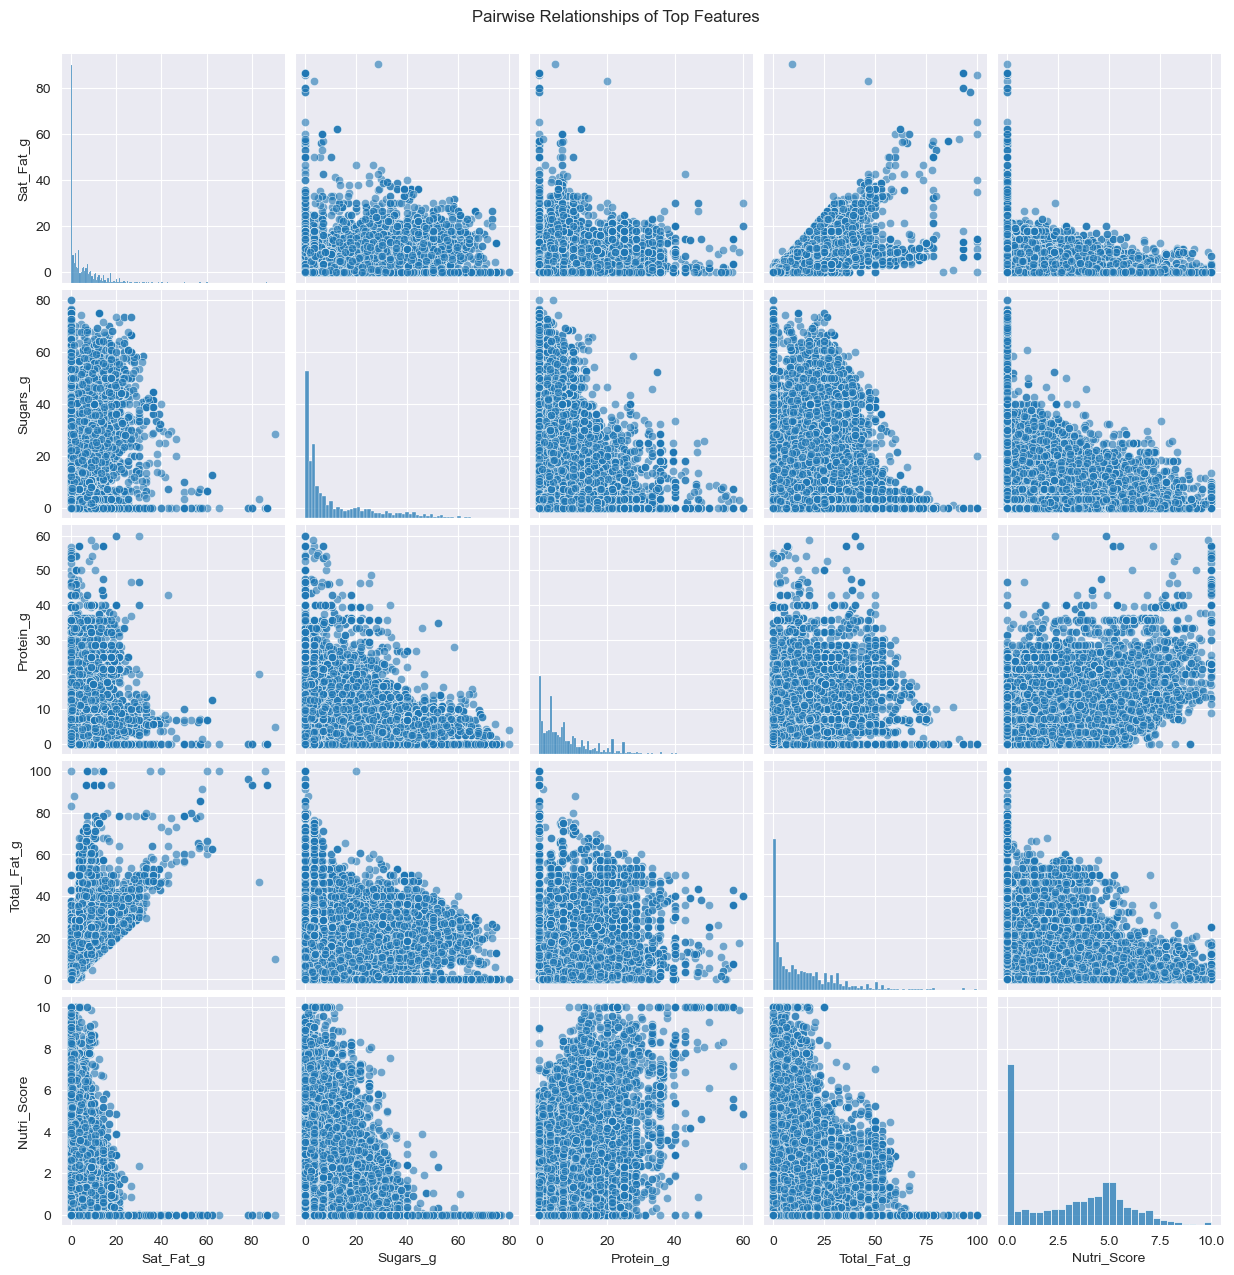

In [27]:
# Create pairplot
sns.pairplot(df[plot_cols], diag_kind='hist', plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Relationships of Top Features', y=1.02)
plt.savefig('pairplot_top_features.png')
plt.show()

### Pairplot

This is one of the most useful plots for a data analysis overview. It's a grid of plots, which you should read in two parts:

#### 1. The Diagonal (Histograms)

* **What they show:** The individual distribution of each feature.
* **Information to Extract:** This confirms our previous findings from the first set of diagrams. We can see that `Sat_Fat_g`, `Sugars_g`, and `Total_Fat_g` are all **heavily right-skewed** (bunched up at zero). `Nutri_Score` is *not* normally distributed; it has several peaks (multi-modal).

#### 2. The Scatter Plots (Off-Diagonal)

* **What they show:** The relationship between every pair of features.
* **Information to Extract:**
    * **Target Relationships (Bottom Row):** Look at the last row, `Nutri_Score`.
        * `Nutri_Score` vs. `Sat_Fat_g`: Shows a clear "L" shape. High scores only exist at low fat levels.
        * `Nutri_Score` vs. `Sugars_g`: Also an "L" shape. High scores only exist at low sugar levels.
        * `Nutri_Score` vs. `Protein_g`: Shows a weak positive trend. The cloud shifts upward as protein increases.
    * **Multicollinearity (Other Plots):** Look for plots that form a tight, straight line.
        * **Key Finding:** Look at `Sat_Fat_g` vs. `Total_Fat_g`. The points form a **very strong, tight line**. This is the visual proof of the **high multicollinearity** (feature redundancy) that the VIF analysis showed.

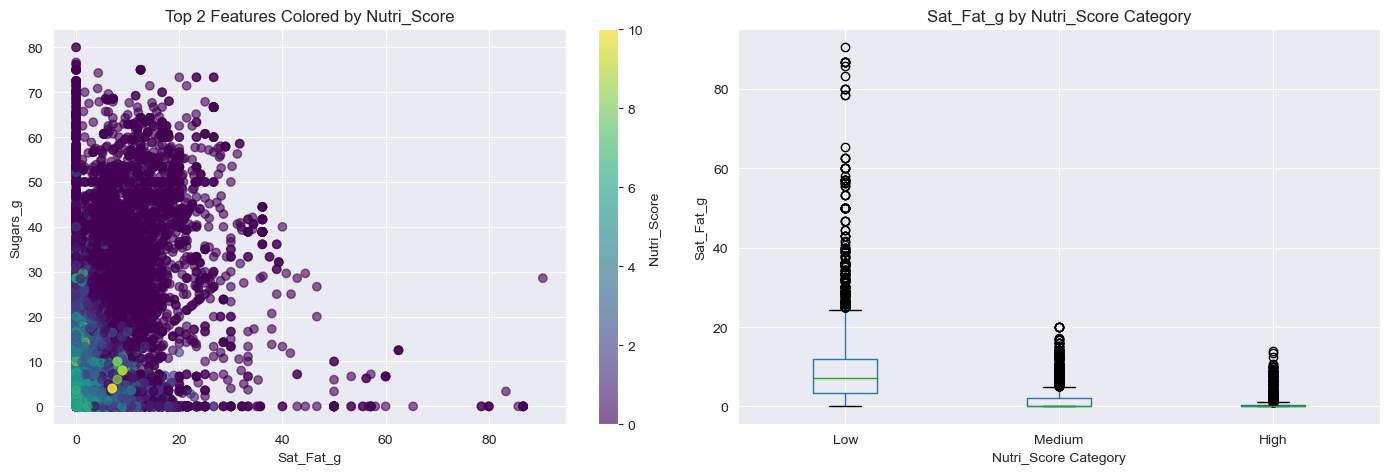

In [28]:
# Create a more detailed plot for top 2 features
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot colored by Nutri_Score
scatter = axes[0].scatter(df[top_features[0]], df[top_features[1]], 
                          c=df['Nutri_Score'], cmap='viridis', alpha=0.6)
axes[0].set_xlabel(top_features[0])
axes[0].set_ylabel(top_features[1])
axes[0].set_title('Top 2 Features Colored by Nutri_Score')
plt.colorbar(scatter, ax=axes[0], label='Nutri_Score')

# Distribution comparison
df['Nutri_Category'] = pd.cut(df['Nutri_Score'], bins=3, labels=['Low', 'Medium', 'High'])
df.boxplot(column=top_features[0], by='Nutri_Category', ax=axes[1])
axes[1].set_xlabel('Nutri_Score Category')
axes[1].set_ylabel(top_features[0])
axes[1].set_title(f'{top_features[0]} by Nutri_Score Category')
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.savefig('detailed_visualization.png')
plt.show()

### Detailed Visualization

#### 1. Scatter Plot (Top 2 Features Colored by Nutri\_Score)

* **What it shows:** The relationship between your top two features (`Sat_Fat_g` and `Sugars_g`) and how they jointly influence the `Nutri_Score`.
* **Information to Extract:**
    * **High `Nutri_Score` (Bright Yellow):** These points are almost **exclusively** clustered in the bottom-left corner. This is a key insight: to get a high score, a food item must have **both** low saturated fat and low sugar.
    * **Low `Nutri_Score` (Dark Purple):** These points appear as soon as *either* `Sat_Fat_g` *or* `Sugars_g` increases.
    * **Feature Relationship:** The data forms a rough "L" shape. This shows that many foods are either high in fat *or* high in sugar, but fewer are extremely high in both.

#### 2. Box Plot (Sat\_Fat\_g by Nutri\_Score Category)

* **What it shows:** This compares the distribution of `Sat_Fat_g` across three different `Nutri_Score` groups (Low, Medium, and High).
* **Information to Extract:**
    * This plot **visually confirms the strong negative correlation** found earlier.
    * **"High" Score Group:** This group has the most compressed box, with a median `Sat_Fat_g` value at or near zero.
    * **"Medium" Score Group:** This group has a slightly higher median and a few outliers.
    * **"Low" Score Group:** This group has the highest median `Sat_Fat_g` and the widest spread. Crucially, **all the extreme outliers** (the circles `°`) belong to the "Low" `Nutri_Score` group.

# Interpretation

In [29]:
# Create summary table
summary_results = pd.DataFrame({
    'Mean': df[X.columns].mean(),
    'Std': df[X.columns].std(),
    'Correlation_with_Target': corr_matrix['Nutri_Score'].drop('Nutri_Score'),
    'Mutual_Information': mi_scores,
    'Feature_Importance': rf_model.feature_importances_
})

summary_results = summary_results.sort_values('Feature_Importance', ascending=False)
print("\n=== COMPREHENSIVE FEATURE ANALYSIS SUMMARY ===")
print(summary_results.to_string())


=== COMPREHENSIVE FEATURE ANALYSIS SUMMARY ===
                   Mean         Std  Correlation_with_Target  Mutual_Information  Feature_Importance
Sat_Fat_g      4.913691    6.998601                -0.570842            0.825577            0.458794
Sugars_g      12.323729   15.437020                -0.627126            1.202825            0.293051
Protein_g      8.058575    8.036180                 0.221429            1.031604            0.131553
Total_Fat_g   13.828846   15.504888                -0.550752            0.985800            0.076108
Fiber_g        2.512985    3.404391                 0.153203            0.653604            0.034505
Energy_kcal  276.172200  178.701650                -0.504597            1.272030            0.003706
Carbs_g       30.932624   25.298818                -0.222541            1.037572            0.002283


### Interpretation of the Analysis

**DATA STATISTICS:**
* The dataset contains 20,000 food products.
* The nutritional features show extremely wide spreads. The standard deviation is often as large or larger than the mean (e.g., `Sat_Fat_g`: mean 4.9, std 7.0; `Sugars_g`: mean 12.3, std 15.4).
* This high variance is a direct result of the severe **right-skewness** and **high kurtosis** (many outliers) identified in the histograms and box plots for fat, sugar, and protein features.

**DATA DISTRIBUTION:**
* Histograms and Q-Q plots confirm that **none of the primary nutritional features are normally distributed**.
* `Sat_Fat_g`, `Sugars_g`, `Total_Fat_g`, `Protein_g`, and `Fiber_g` are all heavily **right-skewed**, with a large number of data points clustered near zero.
* Box plots clearly show that a significant portion of the data for these features consists of **extreme high-value outliers**.

**CORRELATION:**
* The target `Nutri_Score` has the strongest **linear negative correlation** with `Sugars_g` (r=-0.63), `Sat_Fat_g` (r=-0.57), and `Total_Fat_g` (r=-0.55).
* `Protein_g` has a weak **positive correlation** (r=0.22).
* **High multicollinearity** (feature redundancy) was detected in the heatmap between `Energy_kcal` and `Total_Fat_g` (r=0.81) and between `Total_Fat_g` and `Sat_Fat_g` (r=0.69).

**INDEPENDENCE:**
* **Mutual Information (MI)** scores, which detect non-linear relationships, rank the features differently than linear correlation. `Energy_kcal` (MI=1.27) and `Sugars_g` (MI=1.20) show the highest dependence on `Nutri_Score`.
* The VIF analysis (discussed previously) confirmed that the fat-related features and `Energy_kcal` are highly multicollinear, meaning they provide redundant information.

**FEATURE IMPORTANCE:**
* The Random Forest model (which had a very high R² score of 0.988) provides the clearest picture of predictive power.
* **`Sat_Fat_g` (45.9%) is the single most important feature**, by a large margin.
* The top two features, **`Sat_Fat_g` and `Sugars_g` (29.3%), account for over 75%** of the model's predictive ability.
* **Crucial Insight:** `Energy_kcal` (0.4%) and `Carbs_g` (0.2%), despite high MI scores, are found to be almost irrelevant by the model. This is likely because their predictive information is already captured by the more specific `Sat_Fat_g` and `Sugars_g` features.

**VISUALIZATION INSIGHTS:**
* The "Top 2 Features" scatter plot showed that **high `Nutri_Score` values (good health) only exist when *both* `Sat_Fat_g` and `Sugars_g` are near zero**.
* The categorical box plot (Sat_Fat_g by Nutri_Score) visually confirmed that **all the extreme outliers for saturated fat are found in the "Low" `Nutri_Score` (unhealthy) category**.
* The pairplot's grid of scatter plots confirmed the multicollinearity, showing a tight linear pattern between `Total_Fat_g` and `Sat_Fat_g`.

**CONCLUSION (Recommendations for Modeling):**
* **Focus on:** `Sat_Fat_g` and `Sugars_g`. These are by far the most dominant and important features. `Protein_g` is a distant third but still relevant.
* **Transform:** The high skew and extreme outliers in these features will negatively affect models like SVMs or Neural Networks. You must apply a transformation (e.g., **log transform** `log(x+1)`) or use a **tree-based model** (like the Random Forest) which is robust to outliers and skew.
* **Remove:** `Total_Fat_g` (it's redundant with `Sat_Fat_g`). `Energy_kcal` and `Carbs_g` can also be removed as they add no predictive power to the Random Forest model and only contribute to multicollinearity.